In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [9]:
customer_data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Selecting only annual income & spending score.

In [58]:
X = customer_data.iloc[:, [-2,-1]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Choosing an optimal K value using within cluster sum of squares.

In [65]:
w = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    w.append(kmeans.inertia_)

In [60]:
w

[269981.28,
 181363.59595959593,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585636,
 19672.07284901432]

#### Plotting WCSS values vs K.

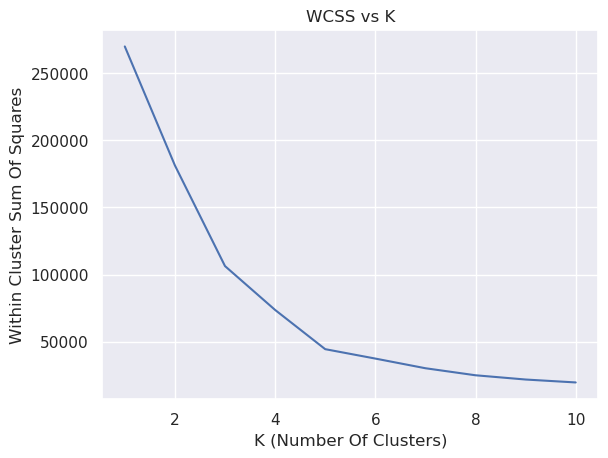

In [66]:
plt.plot(range(1, 11), w)
plt.title('WCSS vs K')
plt.xlabel('K (Number Of Clusters)')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

#### Optimal number of clusters can be 3 or 5 as there is a sharp descent at those values.

#### Usually lesser WCSS scores are preferred, after 5 there is no sharper descent but a gradual one.

#### Training the Kmeans model.

In [67]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')

#### Output labels for each cluster.

In [68]:
Y = kmeans.fit_predict(X)
Y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [69]:
print(type(Y))

<class 'numpy.ndarray'>


In [70]:
y_unique = set(Y)
y_unique

{0, 1, 2, 3, 4}

#### Plotting all clusters with respective centroid/cluster label.

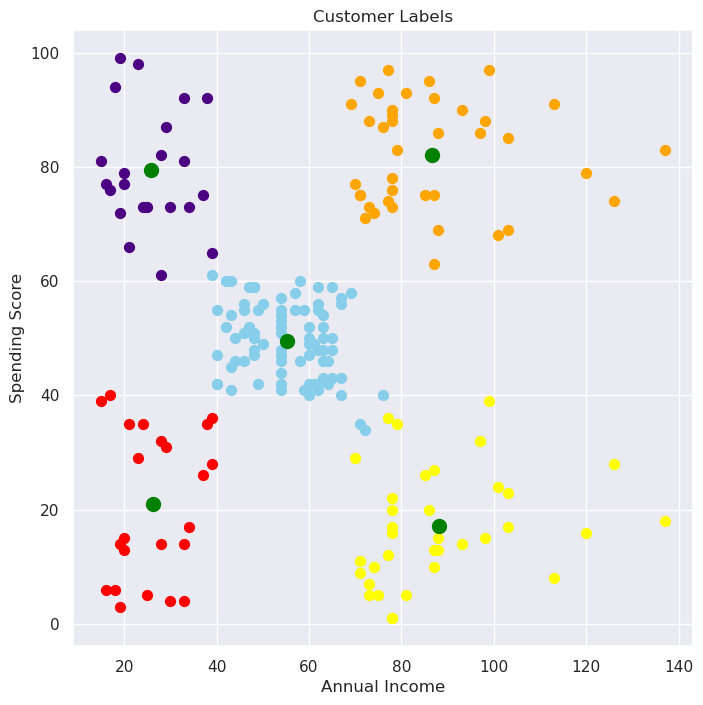

In [71]:
plt.figure(figsize = (8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = 'skyblue', label = '0 Cluster')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = 'indigo', label = '0 Cluster')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = 'orange', label = '0 Cluster')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = 'red', label = '0 Cluster')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s = 50, c = 'yellow', label = '0 Cluster')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')

plt.title('Customer Labels')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()